

# Project: Investigate a Dataset - [No_Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

1. Dataset Description
The dataset for this analysis consists of information from 110,527 medical appointments in brazil with 14 associated variables and was downloaded from the Kaggle data repository. The columns in this dataset includes;
1. PatientID - This means the identification number of a patient.
2. AppintmentID - This means the patient appointment identification number.
3. Gender - It describes the sex of the patient (i.e Male or Female).
4. ScheduledDay - The day the patient called or registered for an appointment with the doctor.
5. AppointmentDay - The actual day the patient visit the doctor.
6. Age - It describes how old the patient is.
7. Neigbourhood - It descibes the location of the appointment in Brazil.
8. Scholarship - It describes whether the patient medical fee is being sponsored by the Bolsa Famila in Brazil or not
9. Hypertension - It describes the patient disease
10.Diabetes - It describes the patient disease
11. Alcoholism - It describes the patient disease
12. Handicap - It describes the patient disease
13. SMS_received - It descibes if an sms message was sent to the patient
14. No_show - It describes if the patient showed up for an appointment or not.¶
NB: It is also good to describe the dependent and the independent variables.
In this analysis, the No_show column is described as the dependent variable while all other columns represents the independent variables.

### Question(s) for Analysis
1. Does the patients age affect the rate of their appointment show up?
2. Does the gender of the patients affect their appointment show up?
3. Does the patients scholarship status affect their appointment show up?
4. Is the appointment show up affected by the patient disease?
5. Is the appointment show up affected by the patient neigbourhood?
6. Is the appointment show up affected by the number of patients who received SMS messages?
7. Does the relationship between the gender and the scholarship status affect the appointment show up?

## Importing of Packages

In [103]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.0MB/s eta 0:00:01 1% |▍                               | 122kB 4.8MB/s eta 0:00:03    13% |████▎                           | 1.4MB 26.7MB/s eta 0:00:01    39% |████████████▊                   | 4.2MB 26.2MB/s eta 0:00:01    91% |█████████████████████████████▍  | 9.6MB 28.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01   12% |████                            | 1.6MB 27.2MB/s eta 0:00:01    31% |██████████▏                     | 4.3MB 25.2MB/s eta 0:00:01    41% |█████████████▏                  | 5.5MB 23.5MB/s eta 0:00:01    59% |███████████████████▏            | 8.0MB 26.0MB/s eta 0:00:01    69% |██████████████████████          | 9.2MB 25.8MB/s eta 0:00:01    87% |████████████████████████████    | 11.7MB 21.9MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Succ

In [104]:
# This cell shows the code to import the necessary packages for this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### 1. Loading of data


In [105]:
# loading of data into the jupyter notebook
dataframe = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")

In [106]:
dataframe.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [107]:
# print the last 5 rows of the dataset
dataframe.tail()

PatientId  AppointmentID Gender          ScheduledDay  \
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
110522  2016-06-07T00:00:00Z   56   MARIA ORTIZ            0             0   
110523  2016-06-07T00:00:00Z   51   MARIA ORTIZ            0             0   
110524  2016-06-07T00:00:00Z   21   MARIA ORTIZ            0             0   
110525  2016-06-07T00:00:00Z   38   MARIA ORTIZ            0             0   
110526  2016-06-07T00:00:00Z   54   MARIA ORTIZ            0             0   

        Diabetes  Alcoholism  Handcap  SMS_received No-show  
110522         0           0        0             1      No  
110523         0           0        0             1      No  
110524         0           0        0             1      No  
110525         0           0        0             1      No  
110526         0           0        0             1      No

### 2. Data Inspection

In [108]:
# Performing of basic operations on data to inspect data for any inconsistency, missing values, white spaces etc.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [109]:
# still performing of basic operations on data
# printing the shape of the dataframe to know the number of rows and columns
dataframe.shape

(110527, 14)

In [110]:
# still performing of basic operations on data
# printing the statistical value of the data
dataframe.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [111]:
# still performing of basic operations on data
# printing the count of unique vales in the data
dataframe.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [112]:
# still performing of basic operations on data
# printing all the columns in the dataset to see if there is a need to change or correct the names
dataframe.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [113]:
# still performing of basic operations on data
# printing all the values in the age column to see if there is any odd value
dataframe.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [114]:
# still performing of basic operations on data
# printing to check the number of patients with -1
dataframe.query("Age==-1").shape[0]

1

In [115]:
# still performing of basic operations on data
# printing to check the number of patients with age 0
dataframe.query("Age==0").shape[0]

3539

In [116]:
# still performing of basic operations on data
# printing to check the type of diseases the patients with 0 age has, which will bring us to a very clear assumptions
dataframe[(dataframe.Age <= 0) & ((dataframe.Hipertension == 1) | (dataframe.Diabetes== 1) | (dataframe.Alcoholism == 1) | (dataframe.Handcap == 1))]

PatientId  AppointmentID Gender          ScheduledDay  \
98247  3.647246e+14        5788682      F  2016-06-08T13:18:12Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
98247  2016-06-08T00:00:00Z    0        JABOUR            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
98247         0           0        1             0      No

In [117]:
# still performing of basic operations on data
# printing to check the number of patients with age greater than 100
dataframe.query("Age>100").shape[0]

7

In [118]:
dataframe[(dataframe.Age >=100) & ((dataframe.Hipertension == 1) | (dataframe.Diabetes== 1) | (dataframe.Alcoholism == 1) | (dataframe.Handcap == 1))]

PatientId  AppointmentID Gender          ScheduledDay  \
63912  3.196321e+13        5700278      F  2016-05-16T09:17:44Z   
63915  3.196321e+13        5700279      F  2016-05-16T09:17:44Z   
68127  3.196321e+13        5562812      F  2016-04-08T14:29:17Z   
76284  3.196321e+13        5744037      F  2016-05-30T09:44:51Z   
79270  9.739430e+12        5747809      M  2016-05-30T16:21:56Z   
79272  9.739430e+12        5747808      M  2016-05-30T16:21:56Z   
97666  7.482346e+14        5717451      F  2016-05-19T07:57:56Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
63912  2016-05-19T00:00:00Z  115    ANDORINHAS            0             0   
63915  2016-05-19T00:00:00Z  115    ANDORINHAS            0             0   
68127  2016-05-16T00:00:00Z  115    ANDORINHAS            0             0   
76284  2016-05-30T00:00:00Z  115    ANDORINHAS            0             0   
79270  2016-05-31T00:00:00Z  100    TABUAZEIRO            0             0   
79272  2016-05-31T00:00:00Z  100    TABUAZEIRO            0             0   
97666  2016-06-03T00:00:00Z  115      SÃO JOSÉ            0             1   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
63912         0           0        1             0     Yes  
63915         0           0        1             0     Yes  
68127         0           0        1             0     Yes  
76284         0           0        1             0      No  
79270         0           0        1             0      No  
79272         0           0        1             0      No  
97666         0           0        0             1      No

### Assumptions and what was noticed during the data inspection.

##### 1. The codes above printed out the unique age in the dataset and we can see that we have an odd age of -1. And we can be safe if we drop the row, since it is not possible for a patient age to be -1,also, it is just a row that has the patient age as -1. Therefore, we assumed that it was a typographical error.

##### 2. We also noticed that there are 3539 patients whose ages are equals to 0, we are safe to assumed that the patients are a day or months old infants, who are less than a year.

##### 3. We also noticed that the diseases attached to the patients of age 0 is only handicap, and this brought us to a clear assumption that the age 0 patients are infants. This means that infants cannot be hypertensive, aloholism or be diabetic.

##### 4. We also noticed that there are patient with age grater than 100, we won't consider them as outliers because we carried out a research to check how old people get to in Brazil, we were able to assume that some people get to the age of 115. Also. considering the dieases attached to these patients which is mostly Handicap, we assumed that a patient whose age is greater than 100 can be handicap.

##### 5. Also, we noticed that the handicap column has 5 different input, and we assume it was a data entry mistake because in the metadata of this dataset, handicap is meant to be a boolean value like the other diseases, so we will equate the response greater than 0 to 1 in the data cleaning section.

##### 6. They are no missing values in our data

##### 7. Some of the columns have the wrong datatype and some columns are not well spelt.

### These few findings will then lead us to the stage of our Data cleaning, so as to be in a perfect fit for our analysis.


### Data Cleaning


In [119]:
dataframe.head(10)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5  9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6  7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7  3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8  5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9  7.812456e+13        5629123      F  2016-04-27T12:48:25Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
5  2016-04-29T00:00:00Z   76          REPÚBLICA            0             1   
6  2016-04-29T00:00:00Z   23         GOIABEIRAS            0             0   
7  2016-04-29T00:00:00Z   39         GOIABEIRAS            0             0   
8  2016-04-29T00:00:00Z   21         ANDORINHAS            0             0   
9  2016-04-29T00:00:00Z   19          CONQUISTA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No  
5         0           0        0             0      No  
6         0           0        0             0     Yes  
7         0           0        0             0     Yes  
8         0           0        0             0      No  
9         0           0        0             0      No

In [120]:
# printing to check if the change has been made
dataframe.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [121]:
# Printing to rename some of the column (e.g. Hipertension, Handcap and SMS_received)
dataframe.rename(columns = {'Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMSReceived','No-show':'NoShow'},inplace = True)
dataframe.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMSReceived NoShow  
0         0           0         0            0     No  
1         0           0         0            0     No  
2         0           0         0            0     No  
3         0           0         0            0     No  
4         1           0         0            0     No

In [122]:
# We are going to drop the AppointmentID and the PatientID columns because they have no impact on our insights.
# Also they are just computer generated numbers.
dataframe.drop(['PatientId', 'AppointmentID'], axis=1, inplace = True)
# we set the axis as 1 because we are dropping columns and not rows
dataframe.head()

Gender          ScheduledDay        AppointmentDay  Age      Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  SMSReceived  \
0            0             1         0           0         0            0   
1            0             0         0           0         0            0   
2            0             0         0           0         0            0   
3            0             0         0           0         0            0   
4            0             1         1           0         0            0   

  NoShow  
0     No  
1     No  
2     No  
3     No  
4     No

In [123]:
# We would also drop the row of the patient whose age is -1
dataframe.drop(dataframe[dataframe['Age'] == -1].index, axis = 0, inplace = True) # We set our axis = 0 because we are dropping rows

In [124]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMSReceived       110526 non-null int64
NoShow            110526 non-null object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


In [125]:
# equate the handicap response greater than 0 to 1
dataframe['Handicap'] = np.where(dataframe['Handicap']>0, 1, 0)

In [126]:
# printing to check if the changes have been reflected.
dataframe.Handicap.unique()

array([0, 1])

In [127]:
# Printing to check if the changes has reflected
dataframe.head()

Gender          ScheduledDay        AppointmentDay  Age      Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  SMSReceived  \
0            0             1         0           0         0            0   
1            0             0         0           0         0            0   
2            0             0         0           0         0            0   
3            0             0         0           0         0            0   
4            0             1         1           0         0            0   

  NoShow  
0     No  
1     No  
2     No  
3     No  
4     No

In [128]:
dataframe['ScheduledDay'] = pd.to_datetime(dataframe.ScheduledDay)
dataframe['AppointmentDay'] = pd.to_datetime(dataframe.AppointmentDay)
dataframe['ScheduleTime'] = dataframe.ScheduledDay.dt.time
dataframe['ScheduledDay'] = dataframe.ScheduledDay.dt.normalize()

In [129]:
dataframe.head(10)

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
5      F   2016-04-27     2016-04-29   76          REPÚBLICA            0   
6      F   2016-04-27     2016-04-29   23         GOIABEIRAS            0   
7      F   2016-04-27     2016-04-29   39         GOIABEIRAS            0   
8      F   2016-04-29     2016-04-29   21         ANDORINHAS            0   
9      F   2016-04-27     2016-04-29   19          CONQUISTA            0   

   Hypertension  Diabetes  Alcoholism  Handicap  SMSReceived NoShow  \
0             1         0           0         0            0     No   
1             0         0           0         0            0     No   
2             0         0           0         0            0     No   
3             0         0           0         0            0     No   
4             1         1           0         0            0     No   
5             1         0           0         0            0     No   
6             0         0           0         0            0    Yes   
7             0         0           0         0            0    Yes   
8             0         0           0         0            0     No   
9             0         0           0         0            0     No   

  ScheduleTime  
0     18:38:08  
1     16:08:27  
2     16:19:04  
3     17:29:31  
4     16:07:23  
5     08:36:51  
6     15:05:12  
7     15:39:58  
8     08:02:16  
9     12:48:25

In [130]:
dataframe['WaitingDays'] = dataframe['AppointmentDay'] - dataframe['ScheduledDay']

In [131]:
dataframe.head(10)

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
5      F   2016-04-27     2016-04-29   76          REPÚBLICA            0   
6      F   2016-04-27     2016-04-29   23         GOIABEIRAS            0   
7      F   2016-04-27     2016-04-29   39         GOIABEIRAS            0   
8      F   2016-04-29     2016-04-29   21         ANDORINHAS            0   
9      F   2016-04-27     2016-04-29   19          CONQUISTA            0   

   Hypertension  Diabetes  Alcoholism  Handicap  SMSReceived NoShow  \
0             1         0           0         0            0     No   
1             0         0           0         0            0     No   
2             0         0           0         0            0     No   
3             0         0           0         0            0     No   
4             1         1           0         0            0     No   
5             1         0           0         0            0     No   
6             0         0           0         0            0    Yes   
7             0         0           0         0            0    Yes   
8             0         0           0         0            0     No   
9             0         0           0         0            0     No   

  ScheduleTime WaitingDays  
0     18:38:08      0 days  
1     16:08:27      0 days  
2     16:19:04      0 days  
3     17:29:31      0 days  
4     16:07:23      0 days  
5     08:36:51      2 days  
6     15:05:12      2 days  
7     15:39:58      2 days  
8     08:02:16      0 days  
9     12:48:25      2 days

In [132]:
# We want to also check if we have a duplicates rows in our dataset
dataframe.duplicated().value_counts()

False    109891
True        635
dtype: int64

In [133]:
# Since we have some duplicates rows in our dataset, we would love to drop them 
#(Duplicates rows are rows that are being registered more than one time in our dataset) 
dataframe.drop_duplicates(inplace = True)

In [134]:
# Printing to check if there are no duplicates again
dataframe.duplicated().value_counts()

False    109891
dtype: int64

In [135]:
sum(dataframe.duplicated())

0

In [136]:
# Printing to check if the dataset is clean now
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109891 entries, 0 to 110526
Data columns (total 14 columns):
Gender            109891 non-null object
ScheduledDay      109891 non-null datetime64[ns]
AppointmentDay    109891 non-null datetime64[ns]
Age               109891 non-null int64
Neighbourhood     109891 non-null object
Scholarship       109891 non-null int64
Hypertension      109891 non-null int64
Diabetes          109891 non-null int64
Alcoholism        109891 non-null int64
Handicap          109891 non-null int64
SMSReceived       109891 non-null int64
NoShow            109891 non-null object
ScheduleTime      109891 non-null object
WaitingDays       109891 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(7), object(4), timedelta64[ns](1)
memory usage: 12.6+ MB


### Now we can see that after our data wrangling steps, we noticed the following:
 - The dataset has been reduced from 110527 to 110526 rows because we dropped the row with the patient age equal to -1.
 - The dataset reduced from 110526 rows to 109891 after we dropped our duplicates.
 - The dataset also reduced from 14 columns to 12 columns after we dropped the PatientID and the AppointmentID columns, but when we included the the schedule time and the waiting days. The column still remains 14.


- Hence, the final dataset for our Exploratory Analysis is (109891, 14)

<a id='intro'></a>
## Exploratory Data Analysis

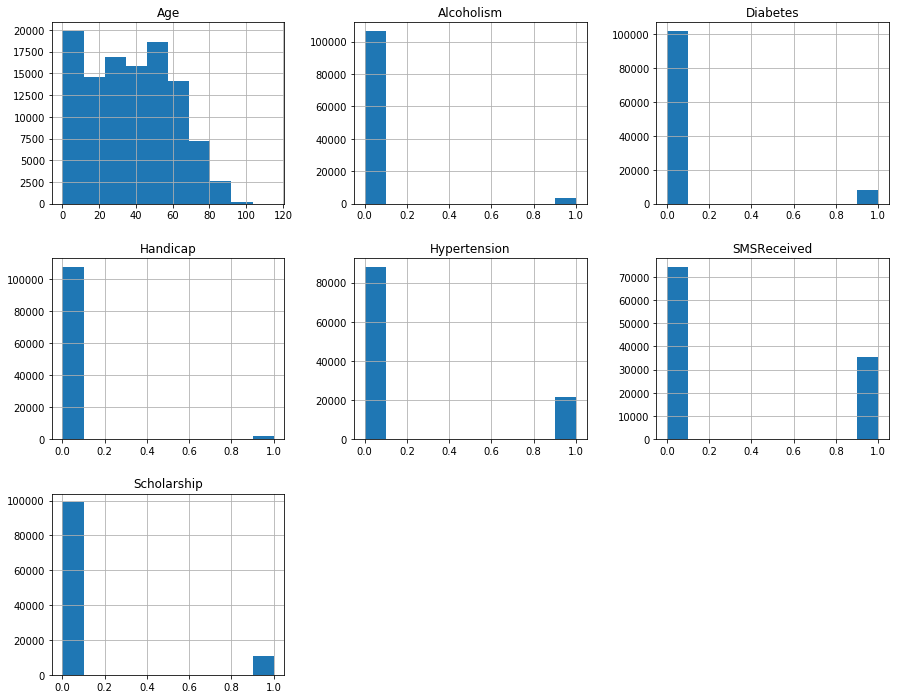

In [137]:
# Printing to explore the data
dataframe.hist(figsize = (15,12));

In [138]:
# Here we change assigned the No to Show and Yes to NoShow to avoid confusion,because in the dataset, the No means Showed and the Yes means NoShow
Show = dataframe.NoShow =='No'
NoShow = dataframe.NoShow == 'Yes'

In [139]:
dataframe[Show].count()

Gender            87793
ScheduledDay      87793
AppointmentDay    87793
Age               87793
Neighbourhood     87793
Scholarship       87793
Hypertension      87793
Diabetes          87793
Alcoholism        87793
Handicap          87793
SMSReceived       87793
NoShow            87793
ScheduleTime      87793
WaitingDays       87793
dtype: int64

In [140]:
dataframe[NoShow].count()

Gender            22098
ScheduledDay      22098
AppointmentDay    22098
Age               22098
Neighbourhood     22098
Scholarship       22098
Hypertension      22098
Diabetes          22098
Alcoholism        22098
Handicap          22098
SMSReceived       22098
NoShow            22098
ScheduleTime      22098
WaitingDays       22098
dtype: int64

 ### Research Question 1. Does the Age affect the patients who showed up?

In [141]:
# Here, we are going to write a function to plot our graphs so as to avoid repetition of codes and codes redundancy
def bar_plot(x,y,k,z,c1,c2='grey'):
    
    plt.figure(figsize=(15,12))
    plt.subplot(1,2,1)
    z[Show].hist( color = c1,label = 'Patients who showed')
    z[NoShow].hist( color = c2,label="Patients didn't show")
    plt.title(k)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()
  

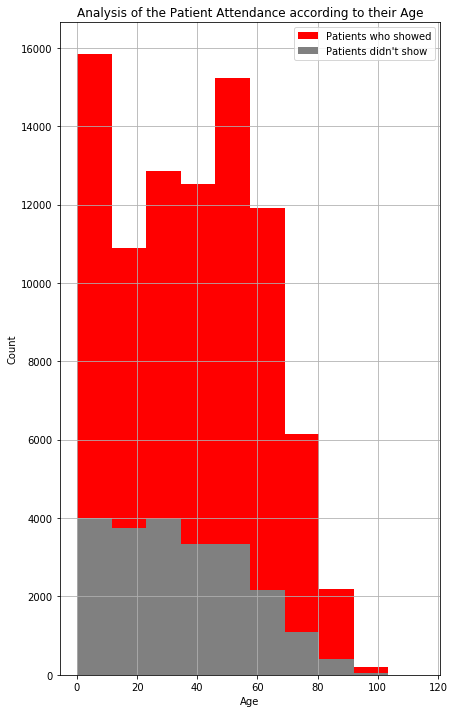

In [142]:
#Printing for the Age
bar_plot('Age','Count','Analysis of the Patient Attendance according to their Age',dataframe.Age,c1 ='red')

### Observation 
- It was observed that does who showed up the most are between the age 0 to 10 and age 40-60.
- It was also observed that the patient who do not really show up for appointment falls between the age 90 to 115.

### Research Question 2. Does the gender of the patients affect their appointment show up?

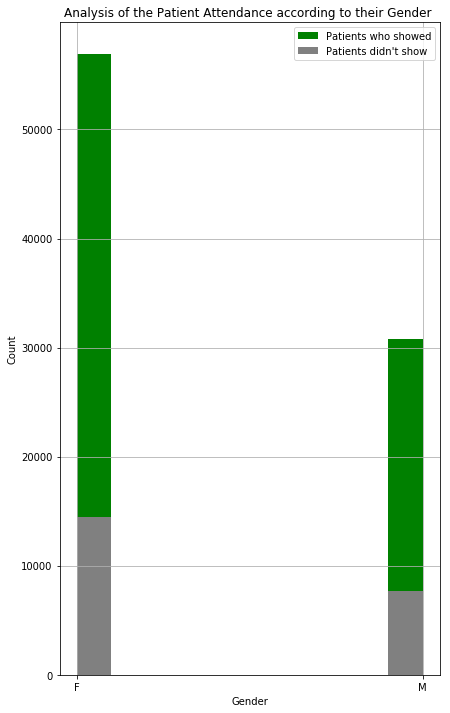

In [143]:
#Printing for the Gender
bar_plot('Gender','Count','Analysis of the Patient Attendance according to their Gender ',dataframe.Gender,c1 ='green')

### Observation
- It was observed that the gender who showed up most for appointment is the female and also the gender who do not show up the most is also female, reasons because in the data set the gender appointment visitation of the female is more than the male gender.

### Research Question 3. Does the patients scholarship status affect their appointment show up?

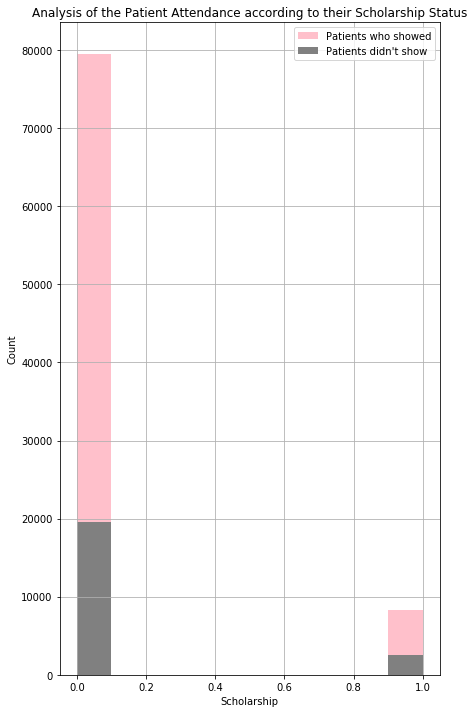

In [144]:
#Printing for the Scholarship
bar_plot('Scholarship','Count','Analysis of the Patient Attendance according to their Scholarship Status',dataframe.Scholarship,c1 ='pink')

### Observation
- It was observed that the percentage of the people who received scholarship and showed up is about 8%
- Also, the people who did not receive any scholarship showed up more

### Research Question 4. Is the appointment show up affected by the patient disease?

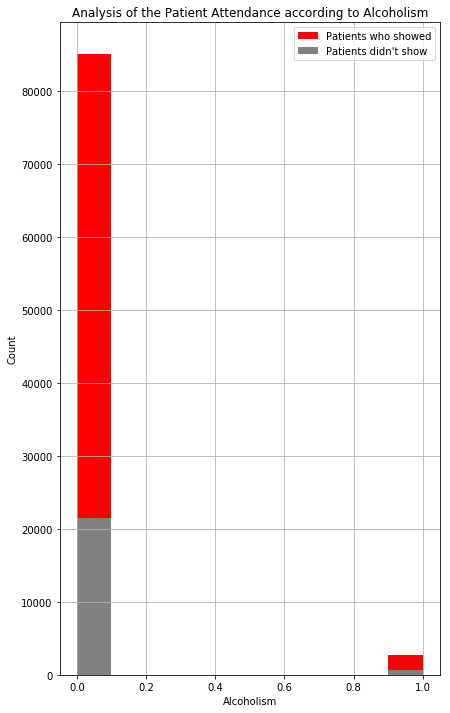

In [145]:
#Printing for the Alcoholism
bar_plot('Alcoholism','Count','Analysis of the Patient Attendance according to Alcoholism',dataframe.Alcoholism,c1 ='red')

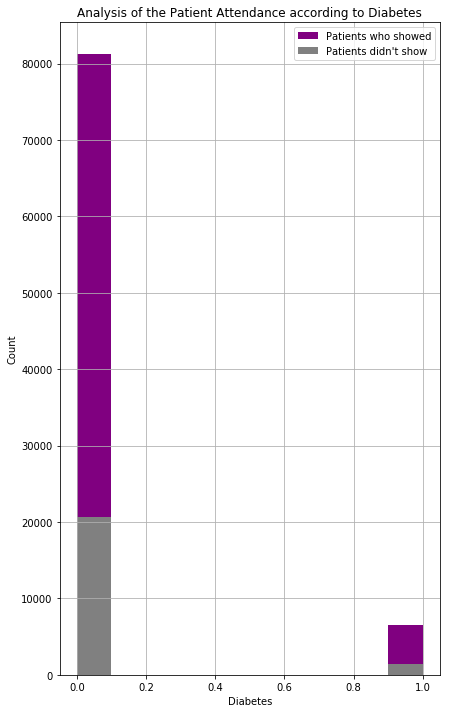

In [146]:
#Printing for the Diabetes
bar_plot('Diabetes','Count','Analysis of the Patient Attendance according to Diabetes',dataframe.Diabetes,c1 ='purple')

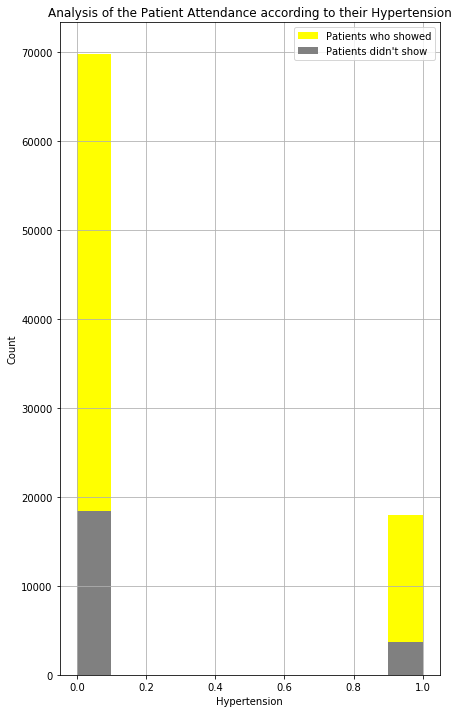

In [147]:
#Printing for the Hypertension
bar_plot('Hypertension','Count','Analysis of the Patient Attendance according to their Hypertension',dataframe.Hypertension,c1 ='yellow')

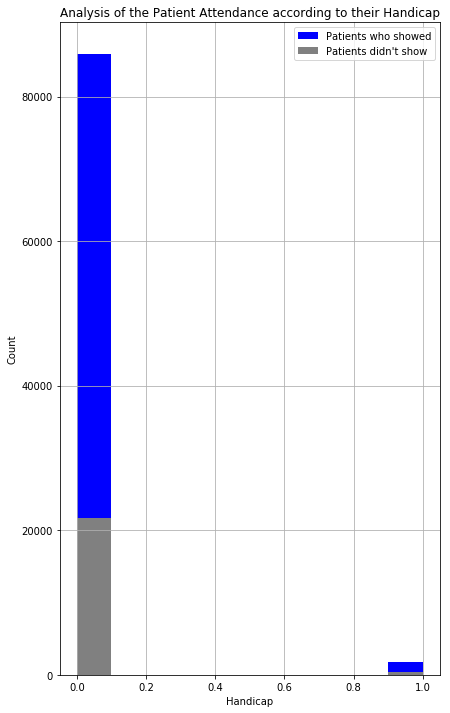

In [148]:
#Printing for the Handicap
bar_plot('Handicap','Count','Analysis of the Patient Attendance according to their Handicap',dataframe.Handicap,c1 ='blue')

### Observation
- The patients who showed up without having any of the diseases are more than the people who showed up having diseases

### Research Question 5. Is the appointment show up affected by the patient neigbourhood?

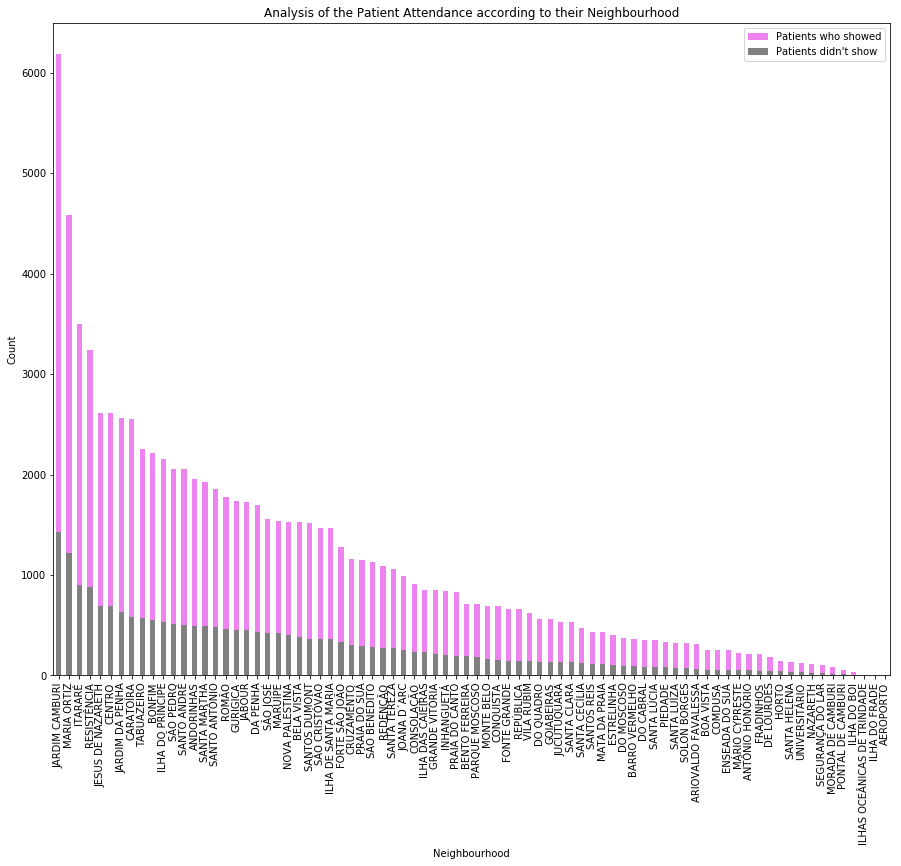

In [149]:
#Printing for comparison between patient attendance and neigbourhood
plt.figure(figsize = (15, 12))
dataframe.Neighbourhood[Show].value_counts().plot(kind ='bar',color = 'violet',label = 'Patients who showed')
dataframe.Neighbourhood[NoShow].value_counts().plot(kind ='bar', color = 'grey',label="Patients didn't show")
plt.legend()
plt.title('Analysis of the Patient Attendance according to their Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count');

### Observation
- The neighbourhood is very significant in considering how patient showed up and do not show up

### Research Question 6. Is the appointment show up affected by the number of patients who received SMS messages?

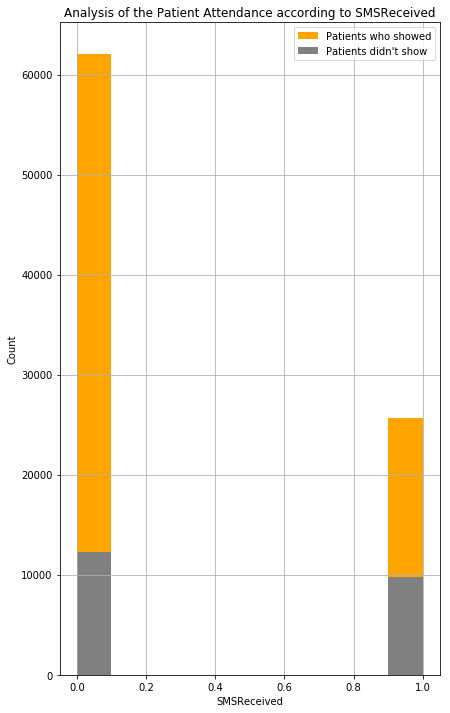

In [150]:
#Printing for the patients who showed up and who did not according to those who received SMS and does who do not
bar_plot('SMSReceived','Count','Analysis of the Patient Attendance according to SMSReceived',dataframe.SMSReceived,c1 ='orange')

### Observation
- It was observed that the patients who didn't receive an SMS even showed up more than the people who received

<a id='conclusions'></a>
## Conclusions

- We concluded that patients having a disease does not really determined if they visit for their appointments or not
- Also, the patient within the age between 0 - 70 showed up more than the patient between the age 70-115
- We also concluded that the patients living in some neighbourhood visit the clinic more and we assumed those neighbourhood are closer to the clinic.

### Limitation
- We could not get if the relationship between the gender and the scholarship status affect the appointment show up? Which may also be part of the reasons we have more female visit the clinic than the male gender


In [151]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0